### HW2

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-poster')

In [2]:
# считаем описание данных
df = pd.read_csv('02_otp_desc.csv', sep=';').loc[:,'ПОЛЕ':'ОПИСАНИЕ']

In [3]:
df.style

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,"целевая переменная:отклик на маркетинговую кампанию (1 - отклик был зарегистрирован, 0 - отклика не было)"
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,"социальный статус клиента относительно работы (1 - работает, 0 - не работает)"
4,SOCSTATUS_PENS_FL,"социальный статус клиента относительно пенсии (1 - пенсионер, 0 - не пенсионер)"
5,GENDER,пол клиента
6,CHILD_TOTAL,количество детей клиента
7,DEPENDANTS,количество иждивенцев клиента
8,EDUCATION,образование
9,MARITAL_STATUS,семейное положение


In [4]:
# считаем все-все данные

In [5]:
train = pd.read_csv('02_otp_train.csv', sep=';')

In [6]:
train.shape

(15223, 52)

In [7]:
test = pd.read_csv('02_otp_test.csv', sep=';')

In [8]:
test.shape

(14910, 51)

In [9]:
# отделим таргет от TRAIN-а

In [10]:
y = train['TARGET']

In [11]:
train = train.drop('TARGET', axis=1)

In [12]:
# соеденим train и test

In [13]:
all_data = pd.concat([train, test])

In [14]:
# необходимо удалить индекс, 
# у нас есть 0-строка в train и 0-строка в test (и так далее 1,2,3,4)
# если мы просто объеденим - у нас сохранятся индексы
# мы же просто уберем индекс и автоматически создастся новый индекс, сквозной и уникальный
all_data = all_data.reset_index(drop=True)

In [15]:
# посмотрим типы данных и их заполняемость

In [16]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_P

In [17]:
# Видим, что часть данных - object, скорее всего стоки.
# Давайте выведем эти значения для каждого столбца

In [18]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца
        print(set(all_data[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print() # выводим пустую строку

EDUCATION
{'Ученая степень', 'Неполное среднее', 'Среднее', 'Неоконченное высшее', 'Высшее', 'Два и более высших образования', 'Среднее специальное'}

MARITAL_STATUS
{'Гражданский брак', 'Состою в браке', 'Разведен(а)', 'Не состоял в браке', 'Вдовец/Вдова'}

GEN_INDUSTRY
{nan, 'Торговля', 'Строительство', 'Коммунальное хоз-во/Дорожные службы', 'Химия/Парфюмерия/Фармацевтика', 'Ресторанный бизнес/Общественное питание', 'Сборочные производства', 'Логистика', 'Транспорт', 'Информационные технологии', 'Салоны красоты и здоровья', 'Недвижимость', 'Страхование', 'Подбор персонала', 'Сельское хозяйство', 'Образование', 'Другие сферы', 'Банк/Финансы', 'Информационные услуги', 'Государственная служба', 'Энергетика', 'Нефтегазовая промышленность', 'ЧОП/Детективная д-ть', 'Металлургия/Промышленность/Машиностроение', 'Наука', 'Управляющая компания', 'Развлечения/Искусство', 'Юридические услуги/нотариальные услуги', 'СМИ/Реклама/PR-агенства', 'Маркетинг', 'Туризм', 'Здравоохранение'}

GEN_TITLE
{na

In [19]:
# можно заметить что некоторые переменные, 
# которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа,
# но по какой-то (ниже увидим) причине были распознаны как строки

In [20]:
all_data['PERSONAL_INCOME'] = all_data['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [21]:
# причина же что использовалась запятая для разделения не целой части числа

In [22]:
all_data['CREDIT'] = all_data['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['FST_PAYMENT'] = all_data['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_AVG_DLQ_AMT'] = all_data['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_MAX_DLQ_AMT'] = all_data['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [23]:
# запускаем повторно код и смотрим, какие столбцы с какими строковыми значениями остались

In [24]:
for i in all_data.columns:
    if str(all_data[i].dtype) == 'object':
        print(i)
        print(set(all_data[i]))
        print()

EDUCATION
{'Ученая степень', 'Неполное среднее', 'Среднее', 'Неоконченное высшее', 'Высшее', 'Два и более высших образования', 'Среднее специальное'}

MARITAL_STATUS
{'Гражданский брак', 'Состою в браке', 'Разведен(а)', 'Не состоял в браке', 'Вдовец/Вдова'}

GEN_INDUSTRY
{nan, 'Торговля', 'Строительство', 'Коммунальное хоз-во/Дорожные службы', 'Химия/Парфюмерия/Фармацевтика', 'Ресторанный бизнес/Общественное питание', 'Сборочные производства', 'Логистика', 'Транспорт', 'Информационные технологии', 'Салоны красоты и здоровья', 'Недвижимость', 'Страхование', 'Подбор персонала', 'Сельское хозяйство', 'Образование', 'Другие сферы', 'Банк/Финансы', 'Информационные услуги', 'Государственная служба', 'Энергетика', 'Нефтегазовая промышленность', 'ЧОП/Детективная д-ть', 'Металлургия/Промышленность/Машиностроение', 'Наука', 'Управляющая компания', 'Развлечения/Искусство', 'Юридические услуги/нотариальные услуги', 'СМИ/Реклама/PR-агенства', 'Маркетинг', 'Туризм', 'Здравоохранение'}

GEN_TITLE
{na

# Данные готовы, теперь вам предлагается начать решать задачу

In [25]:
# Есть ли пропуски в данных? что с ними сделать?

In [26]:
# Разделим признаки на числовые и категориальные
cat_cols = [col for col in all_data.columns if all_data[col].dtype == 'object']
num_cols = all_data.columns[~all_data.columns.isin(cat_cols)].tolist()

In [27]:
# в числовых признаках заполним пропуски нулями, в категориальных - строкой "OTHER"
all_data.loc[:, cat_cols] = all_data.loc[:, cat_cols].fillna('OTHER')
all_data.loc[:, num_cols] = all_data.loc[:, num_cols].fillna(0)

all_data.isna().sum().sum()

0

In [28]:
# также удалим уникальный идентификатор объекта в выборке
all_data = all_data.drop('AGREEMENT_RK', axis=1)
num_cols.remove('AGREEMENT_RK')

***

In [29]:
# Как поступить со строковыми переменными?

In [30]:
# Удалим регион почтового адреса и адреса регистрации, так как на большинстве объектов они дублируют фактический адрес
all_data = all_data.drop(['REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE'], axis=1)
cat_cols.remove('REG_ADDRESS_PROVINCE')
cat_cols.remove('POSTAL_ADDRESS_PROVINCE')

In [31]:
all_data[cat_cols].nunique().sum()

248

In [32]:
# применим one-hot encoding для категориальных признаков
all_data = pd.get_dummies(all_data, columns=cat_cols)

In [33]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 285 entries, AGE to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(30), uint8(248)
memory usage: 15.6 MB


In [34]:
# В итоге должны получиться данные без пропусков и только числовые

***

In [35]:
# Вновь разделите на train и test (не мешая)
df_train = all_data.iloc[:train.shape[0]]
df_test = all_data.iloc[train.shape[0]:]

In [36]:
# масштабирование признаков
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_train[df_train.columns] = scaler.fit_transform(df_train)
df_test[df_test.columns] = scaler.transform(df_test)

***

In [37]:
# Сделать hold-out sampling на train выборке
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42

In [38]:
X_train, X_val, y_train, y_val = train_test_split(df_train, y, test_size=0.3, random_state=42)

***

In [39]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [40]:
model1 = DecisionTreeClassifier(random_state=42)
model2 = RandomForestClassifier(random_state=42)
model3 = LogisticRegression(random_state=42)
models = [model1, model2, model3]

In [41]:
preds = []
probs = []

for model in models:
    model.fit(X_train, y_train)
    preds.append(model.predict(X_val))
    probs.append(model.predict_proba(X_val))

***

In [42]:
# Посчитать метрики стандартные
# accuracy, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [43]:
accs = [accuracy_score(y_val, preds[i]) for i in range(len(preds))]
precs = [precision_score(y_val, preds[i]) for i in range(len(preds))]
recs = [recall_score(y_val, preds[i]) for i in range(len(preds))]
st_scores = pd.DataFrame({'Accuracy':accs,'Precision': precs, 'Recall':recs}, 
                         index=['DecisionTreeClassifier','RandomForestClassifier','LogisticRegression'])
st_scores

,Accuracy,Precision,Recall
DecisionTreeClassifier,0.796803,0.167558,0.169369
RandomForestClassifier,0.876724,0.214286,0.005405
LogisticRegression,0.876724,0.375000,0.021622


***

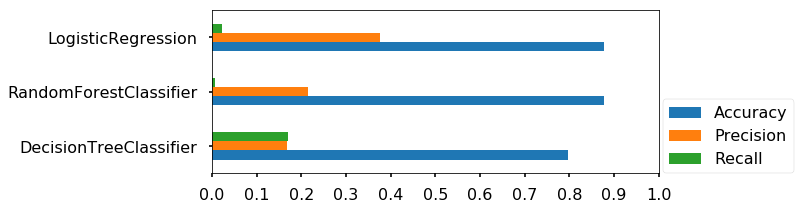

In [44]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
fig, ax = plt.subplots(figsize=(8,3))
st_scores.plot(kind='barh', ax=ax)
ax.legend(loc=(1.01,0))
ax.set_xticks(np.linspace(0, 1, 11));

***

In [45]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой модели
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score

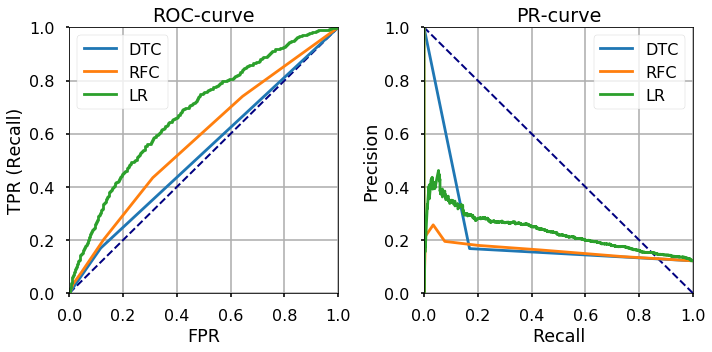

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].plot([1, 0], [0, 1], color='navy', lw=2, linestyle='--')    
axes[0].set_xlabel('FPR')
axes[0].set_ylabel('TPR (Recall)')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[0].set_title('ROC-curve')
axes[1].set_title('PR-curve')

labels = ['DTC', 'RFC', 'LR']
roc_aucs = []
pr_aucs = []

for i in range(2):
    axes[i].set_xlim([0,1])
    axes[i].set_ylim([0,1])
    axes[i].grid()

for i in range(len(models)):

    pr, rec, thresholds_pr = precision_recall_curve(y_val, probs[i][:,1])
    fpr, tpr, thresholds_roc = roc_curve(y_val, probs[i][:,1])

    axes[0].plot(fpr, tpr, label=labels[i])
    axes[1].plot(rec, pr, label=labels[i])
    
    axes[0].legend()
    axes[1].legend()
    
    roc_auc = roc_auc_score(y_val, probs[i][:,1])
    pr_auc = average_precision_score(y_val, probs[i][:,1])
    
    roc_aucs.append(roc_auc)
    pr_aucs.append(pr_auc)
    
aucs = pd.DataFrame({'ROC-AUC':roc_aucs,'PR-AUC': pr_aucs}, 
                         index=['DecisionTreeClassifier','RandomForestClassifier','LogisticRegression'])
fig.tight_layout();

In [47]:
aucs

,PR-AUC,ROC-AUC
DecisionTreeClassifier,0.129321,0.526484
RandomForestClassifier,0.150575,0.577528
LogisticRegression,0.232101,0.682985


***

In [48]:
from sklearn.model_selection import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

In [49]:
for i, model in enumerate(models):
    score = np.mean(cross_val_score(model, df_train, y, scoring='roc_auc', cv=10, n_jobs=-1))
    print(labels[i] + ' ROC-AUC: ' + str(np.around(score, 3)))

DTC ROC-AUC: 0.531
RFC ROC-AUC: 0.598
LR ROC-AUC: 0.682


***

In [50]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

In [51]:
best_model = models[2]    # логистическая регрессия
best_model.fit(df_train, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
preds = best_model.predict_proba(df_test)

In [53]:
pd.DataFrame({'y':preds[:,1]}).to_csv('test_preds.csv', index=False)